### Assignment Question:

**Case Study: Sales Analysis for E-Commerce Business**

You are a data analyst at **ShopEase**, a leading e-commerce company that sells a variety of products across multiple categories (electronics, fashion, home essentials, etc.). The company has been experiencing fluctuations in sales and user activity over the past two years. As part of the analytics team, you have been tasked with understanding the trends, seasonality, and irregular patterns in the sales data to help inform marketing strategies and improve inventory management.

**Task:**

Analyze the time-series sales dataset of ShopEase from January 2022 to October 2024. The dataset includes the following columns:

- `Date`: The date of the sales record.
- `Category`: The product category (e.g., Electronics, Fashion, Home Essentials).
- `Revenue`: Total sales revenue for the day.
- `Number_of_Orders`: Number of orders placed on that day.
- `User_Visits`: Number of unique users who visited the website.
- `Promotions`: A binary indicator (0 or 1) if a promotion or sale event was running on that day.

**Questions:**

1. **Trend Analysis:** Identify and visualize the overall sales trend for each product category. Are there any noticeable upward or downward trends? What might be the cause?

2. **Seasonality Detection:** Investigate whether there are seasonal patterns in sales (e.g., increased sales during holidays or promotional events). What are the most significant peaks and troughs?

3. **Correlation Analysis:** Examine the relationship between the number of user visits, the number of orders, and revenue over time. How do promotions affect these metrics?

4. **Forecasting:** Use historical data to forecast the revenue for the next quarter (November 2024 - January 2025). What can you predict about the company's sales performance?

5. **Anomaly Detection:** Identify any unusual sales spikes or drops that do not align with typical trends or seasonality. What could be potential reasons for these anomalies?

*Deliverables:* Provide visualizations (line plots, bar charts, and heatmaps) to support your analysis, along with a detailed report summarizing your findings and insights.

In [15]:
import pandas as pd
import seaborn as sns
import plotly as plt

In [16]:
df=pd.read_csv('ecommerce_sales_data.csv')
df.head()

,Date,Category,Revenue,Number_of_Orders,User_Visits,Promotions
0,2022-01-01,Home Essentials,14812.0,55.0,8159.0,0
1,2022-01-02,Home Essentials,3922.0,280.0,8665.0,0
2,2022-01-03,Electronics,5344.0,211.0,7110.0,0
3,2022-01-04,Home Essentials,7529.0,43.0,3125.0,0
4,2022-01-05,Fashion,22873.5,408.0,5307.6,1


In [17]:
df.shape

(1035, 6)

1. **Trend Analysis:** Identify and visualize the overall sales trend for each product category. Are there any noticeable upward or downward trends? What might be the cause?

In [26]:
# Assuming trend_analysis is already created
trend_analysis = df.groupby('Category')[['Number_of_Orders', 'Revenue', 'User_Visits']].sum()
trend_analysis

,Number_of_Orders,Revenue,User_Visits
Category,,,
Electronics,60100.80,4494721.60,1899737.8
Fashion,60314.05,4181229.75,1822819.6
Home Essentials,58840.95,3983526.20,1678605.0


2. **Seasonality Detection:** Investigate whether there are seasonal patterns in sales (e.g., increased sales during holidays or promotional events). What are the most significant peaks and troughs?

In [29]:
import datetime
df['Date']=pd.to_datetime(df['Date'])

In [30]:
df['Day_of_week']=df['Date'].dt.day_name()

In [32]:
df=df.set_index('Date')
df.head()

,Category,Revenue,Number_of_Orders,User_Visits,Promotions,Day_of_week
Date,,,,,,
2022-01-01,Home Essentials,14812.0,55.0,8159.0,0,Saturday
2022-01-02,Home Essentials,3922.0,280.0,8665.0,0,Sunday
2022-01-03,Electronics,5344.0,211.0,7110.0,0,Monday
2022-01-04,Home Essentials,7529.0,43.0,3125.0,0,Tuesday
2022-01-05,Fashion,22873.5,408.0,5307.6,1,Wednesday


<Axes: xlabel='Date'>

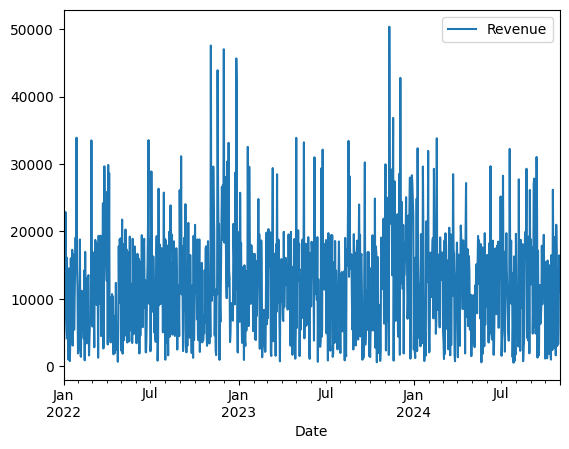

In [49]:
%matplotlib inline
highest_sales= df[['Revenue']].resample('D').sum()
highest_sales.plot()

<Axes: xlabel='Day_of_week'>

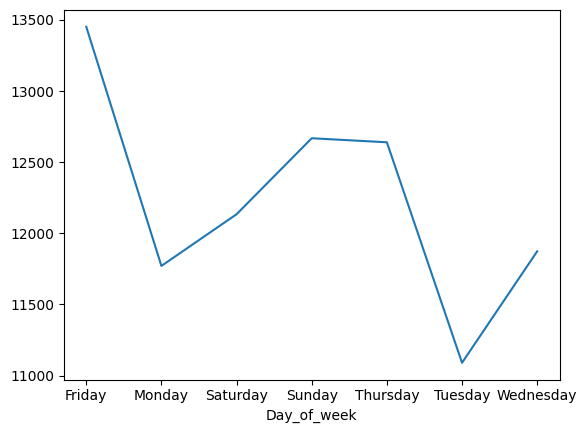

In [68]:
dt=df.groupby('Day_of_week')['Revenue'].mean()
dt.plot()

**As we can see in the above chart the peak revenue was held on Friday and the lowest revenue was collected on Tuesday. Following that the saturday and sunday is the day where purchase are same but significant.**

<Axes: xlabel='Day_of_week'>

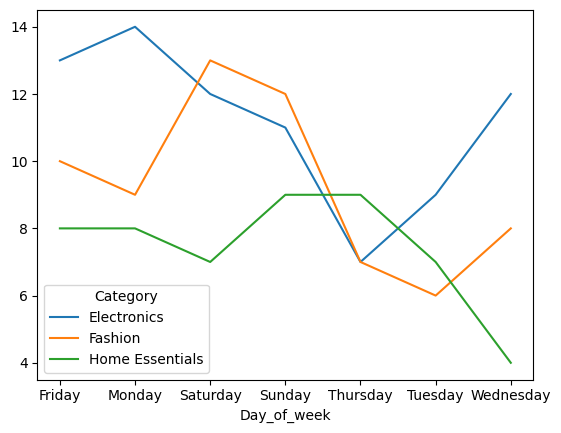

In [67]:
import pandas as pd

# Assuming df is your DataFrame
result = pd.crosstab(index=df['Day_of_week'], columns=df['Category'], values=df['Promotions'], aggfunc='sum')
result.plot()

In [66]:
df.groupby('Category')['Revenue'].sum()

Category
Electronics        4494721.60
Fashion            4181229.75
Home Essentials    3983526.20
Name: Revenue, dtype: float64

**The data is clearly depecting that the Promotion and holidays has a direct impact in footfall as we can see that the more Promotions on Electronics lead to the more Revenue and the less promotion leads to the less sales.**

<Axes: xlabel='User_Visits'>

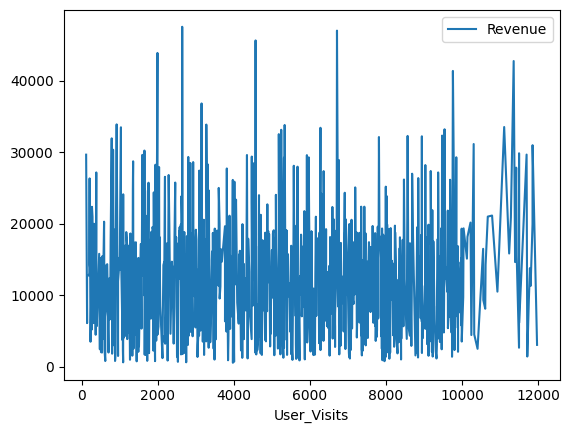

In [87]:
user=pd.pivot_table(df,index=['User_Visits'],values=['Revenue'])
user.plot()

**From 2022-2024 we can see that the Visitors are growing and as visitors growing the economy also rising means the footfall is genuiene and retention rate is good**

In [96]:
td=df.groupby('Category')['User_Visits'].mean()
td

Category
Electronics        5277.049444
Fashion            5237.987356
Home Essentials    5133.348624
Name: User_Visits, dtype: float64

### REPORT OF ANALYSIS
- It is clear Promotions are the key for the sales, providing the lucrative promotion can suerly lead to the more sales.
- As the data shows that the sales are more driven from the weekday means customers are those who are working professionals.
- Electronics and Fashion are the Good and growing Category while Home Essentials are having low sales because of the No discounts and promotions.
